In [14]:
import pandas as pd
import numpy as np
import math

from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df = pd.read_csv("./data/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
dataset = df.to_numpy()

In [10]:
dataset.shape

(150, 6)

In [ ]:
trainingSet = dataset[:149]
testingSet = dataset[149:]

array([[150, 5.9, 3.0, 5.1, 1.8, 'Iris-virginica']], dtype=object)

In [ ]:
# Euclidean distance computation
def computeDistance(dataPoint1, dataPoint2):
    result = 0
    for i in range(4):
        result += (float(dataPoint1[i]) - float(dataPoint2[i])) ** 2
    return math.sqrt(result)

In [ ]:
# Compute and return k nearest neighbors
def computeKNearestNeighbor(trainingSet, item, k):
    distances = []
    for dataPoint in trainingSet:
        distances.append(
            {"label": dataPoint[-1], "value": computeDistance(item, dataPoint)}
        )
    distances.sort(key=lambda x: x["value"])
    labels = [item["label"] for item in distances]
    return labels[:k]

In [ ]:
# Votings
def voteTheDistances(array):
    labels = set(array)
    result = ""
    maxOccur = 0
    for label in labels:
        num = array.count(label)
        if num > maxOccur:
            maxOccur = num
            result = label
    return result


In [34]:
k = 5
for item in testingSet:
    knn = computeKNearestNeighbor(trainingSet, item, k)
    y_pred = voteTheDistances(knn)
    print(f"GT = {item[-1]}, Prediction = {y_pred}")


GT = Iris-virginica, Prediction = Iris-virginica


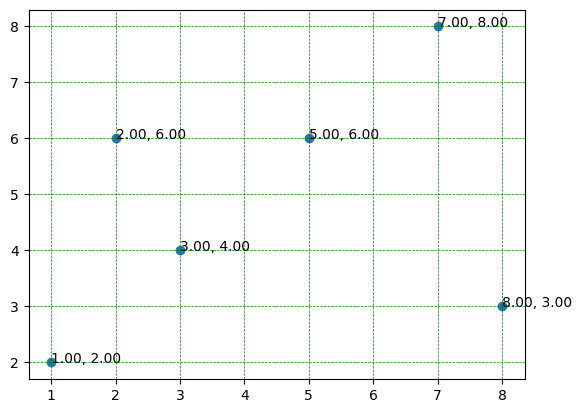

In [ ]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 5, 7, 8]
y = [2, 6, 4, 6, 8, 3]

for xy in zip(x, y):
    plt.annotate("%.2f, %.2f" % xy, xy=xy)

plt.scatter(x, y)
plt.grid(color="green", linestyle="--", linewidth=0.5)

plt.show()

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KDTree
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter

# Load Iris dataset
iris_dataset = load_iris()


In [40]:
print(iris_dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [38]:
X = iris_dataset.data
y = iris_dataset.target

In [ ]:
## Dùng KDTree
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Build KDTree
tree = KDTree(X_train, leaf_size=2)

# Select one test sample
x_query = X_test[0]  # Điểm cần dự đoán
true_label = y_test[0]  # cái này dùng để so sánh với kết quả dự đoán

# Query the 3 nearest neighbors
k = 3
distances, indices = tree.query(
    [x_query], k=k
)  # khoảng cách từ x_query đến các hàng xóm và vị trí trong X_train của các hàng xóm
neighbors = y_train[indices[0]]

# Majority vote (Đếm xem nhãn nào xuất hiện nhiều nhất)
predicted_label = Counter(neighbors).most_common(1)[0][0]

print(predicted_label)

1


In [ ]:
## Dùng KNN Brute force
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

k = 3
knn = KNeighborsClassifier(n_neighbors=k, algorithm="brute", metric="euclidean")

knn.fit(X_train, y_train)

x_query = X_test[0]

predicted_label = knn.predict([x_query])[0]
print(predicted_label)

1
